In [1]:
import numpy
import pandas
import matplotlib
import seaborn
import warnings
matplotlib.pyplot.style.use('dark_background')
PALETTE = ["#10002B", "#240046", "#3C096C", "#5A189A", "#7B2CBF", "#9D4EDD", "#C77DFF", "#E0AAFF"]
warnings.filterwarnings("ignore")

In [2]:
sales=pandas.read_csv("/home/hussein-ali/CORE/Supermarket Sales Analysis/data/sales-data.csv")

In [3]:
sales.head(2)

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,9.6


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


In [5]:
sales.shape

(1006, 16)

In [6]:
sales["Total"][sales["Total"].isna()]

0    NaN
14   NaN
37   NaN
Name: Total, dtype: float64

In [7]:
sales["Tax 5%"][sales["Tax 5%"].isna()]

3     NaN
8     NaN
86    NaN
92    NaN
97    NaN
629   NaN
830   NaN
881   NaN
903   NaN
Name: Tax 5%, dtype: float64

In [8]:
sales["Unit price"]  = pandas.to_numeric(sales["Unit price"],errors="coerce")

In [9]:
sales.loc[0,"Total"] = sales.loc[0]["Quantity"]  * sales.loc[0]["Unit price"]+sales.loc[0]["Tax 5%"]
sales.loc[14,"Total"]= sales.loc[14]["Quantity"] * sales.loc[14]["Unit price"]+sales.loc[14]["Tax 5%"]
sales.loc[37,"Total"]= sales.loc[37]["Quantity"] * sales.loc[37]["Unit price"]+sales.loc[37]["Tax 5%"]

In [10]:
sales.loc[3,"Tax 5%"]   = (sales.loc[3]["Total"])  - (sales.loc[3]["Quantity"]  * sales.loc[3]["Unit price"]  )
sales.loc[8,"Tax 5%"]   = (sales.loc[8]["Total"])  - (sales.loc[8]["Quantity"]  * sales.loc[8]["Unit price"]  )
sales.loc[86,"Tax 5%"]  = (sales.loc[86]["Total"]) - (sales.loc[86]["Quantity"] * sales.loc[86]["Unit price"] )
sales.loc[92,"Tax 5%"]  = (sales.loc[92]["Total"]) - (sales.loc[92]["Quantity"] * sales.loc[92]["Unit price"] )

In [11]:
sales.drop(index=[97,629,830,881,903],inplace=True)

In [12]:
print(sales["Total"][sales["Total"].isna()].sum())
print(sales["Tax 5%"][sales["Tax 5%"].isna()].sum())

0.0
0.0


In [13]:
sales.isna().sum()

Invoice ID       0
Branch           0
Yangon           0
Naypyitaw        0
Mandalay         0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [14]:
sales.isnull().sum()

Invoice ID       0
Branch           0
Yangon           0
Naypyitaw        0
Mandalay         0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [15]:
sales.duplicated().sum()

np.int64(6)

In [16]:
sales = sales.drop_duplicates(keep="last")

In [17]:
sales.duplicated().sum()

np.int64(0)

In [18]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     995 non-null    object 
 1   Branch         995 non-null    object 
 2   Yangon         995 non-null    int64  
 3   Naypyitaw      995 non-null    int64  
 4   Mandalay       995 non-null    int64  
 5   Customer type  995 non-null    object 
 6   Gender         995 non-null    object 
 7   Product line   995 non-null    object 
 8   Unit price     995 non-null    float64
 9   Quantity       995 non-null    int64  
 10  Tax 5%         995 non-null    float64
 11  Total          995 non-null    float64
 12  Date           995 non-null    object 
 13  Time           995 non-null    object 
 14  Payment        995 non-null    object 
 15  Rating         995 non-null    float64
dtypes: float64(4), int64(4), object(8)
memory usage: 132.1+ KB


In [19]:
sales["Branch"].value_counts()

Branch
A    337
B    332
C    326
Name: count, dtype: int64

In [20]:
sales["Customer type"].value_counts()

Customer type
Normal     509
Member     458
-           27
Memberr      1
Name: count, dtype: int64

In [21]:
sales.loc[sales["Customer type"]=="Memberr"] = "Member"

In [22]:
sales.loc[sales["Customer type"]=="-"] = "Member" 

In [23]:
sales["Gender"].value_counts()

Gender
Male      505
Female    462
Member     28
Name: count, dtype: int64

In [24]:
sales.drop(index=sales.loc[sales["Gender"]=="Member"].index,inplace=True)

In [25]:
sales["Product line"].value_counts()

Product line
Fashion accessories       171
Food and beverages        168
Electronic accessories    164
Sports and travel         162
Home and lifestyle        156
Health and beauty         146
Name: count, dtype: int64

In [26]:
sales["Date"]=pandas.to_datetime(sales["Date"],format="mixed").dt.date

In [27]:
print(sales["Date"].min(),sales["Date"].max())

2019-01-01 2019-03-30


In [28]:
sales.loc[sales["Time"]=="8 - 30 PM"] = "08:30"

In [29]:
sales["Time"]

0       13:08
1       10:29
2       13:23
3       08:30
4       10:37
        ...  
1001    14:30
1002    11:32
1003    10:41
1004    12:44
1005    20:07
Name: Time, Length: 967, dtype: object

In [30]:
sales.drop(index=sales.loc[sales["Payment"]=="08:30"].index,inplace=True)

In [31]:
sales["Payment"].value_counts()

Payment
Ewallet        334
Cash           329
Credit card    303
Name: count, dtype: int64

In [32]:
sales.loc[sales["Rating"]==97.0,"Rating"]=sales["Rating"].mean()

In [33]:
sales["Rating"].value_counts()

Rating
6.000000     26
6.600000     23
4.200000     22
5.000000     21
8.000000     21
             ..
8.100000     11
4.000000     10
4.600000      8
10.000000     3
7.052899      1
Name: count, Length: 62, dtype: int64

In [34]:
print(sales["Rating"].min(),sales["Rating"].max())

4.0 10.0


In [35]:
sales.columns

Index(['Invoice ID', 'Branch', 'Yangon', 'Naypyitaw', 'Mandalay',
       'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity',
       'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'Rating'],
      dtype='object')

In [36]:
total_Q3 = sales["Total"].quantile(0.75)
total_Q1 = sales["Total"].quantile(0.25)
total_IQR= total_Q3-total_Q1
total_U  = total_Q3 + (1.5*total_IQR) 
total_L  = total_Q1 - (1.5*total_IQR)
total_Min = sales["Total"].min()
total_Max = sales["Total"].max()
print("Q1:{a} - Q3:{b} - IQR:{c} - U:{d} - L:{e} - Min:{f} - Max:{g}".format(a=total_Q1,b=total_Q3,c=total_IQR,d=total_U,e=total_L,f=total_Min,g=total_Max))

Q1:126.29925 - Q3:470.44725 - IQR:344.148 - U:986.6692499999999 - L:-389.92274999999995 - Min:10.6785 - Max:1042.65


In [37]:
tax_Q3 = sales["Tax 5%"].quantile(0.75)
tax_Q1 = sales["Tax 5%"].quantile(0.25)
tax_IQR= tax_Q3-tax_Q1
tax_U  = tax_Q3 + (1.5*tax_IQR) 
tax_L  = tax_Q1 - (1.5*tax_IQR)
tax_Min = sales["Tax 5%"].min()
tax_Max = sales["Tax 5%"].max()
print("Q1:{a} - Q3:{b} - IQR:{c} - U:{d} - L:{e} - Min:{f} - Max:{g}".format(a=tax_Q1,b=tax_Q3,c=tax_IQR,d=tax_U,e=tax_L,f=tax_Min,g=tax_Max))

Q1:6.01425 - Q3:22.402250000000002 - IQR:16.388 - U:46.98425 - L:-18.56775 - Min:0.5085 - Max:49.65


In [38]:
sales.drop(index=sales[((sales["Total"]>total_U)|(sales["Total"]<total_L))&((sales["Tax 5%"]>tax_U)|(sales["Tax 5%"]<tax_L))].index,inplace=True)

In [39]:
sales

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,5.3
5,699-14-3026,C,0,1,0,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.985,860.685,2019-03-03,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.649,34.629,2019-02-05,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2019-02-05,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.494,535.374,2019-02-15,12:44,Cash,8.4


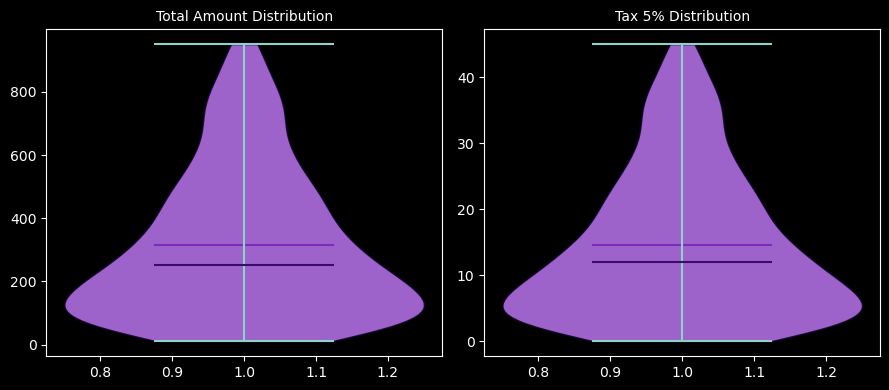

In [40]:
fig, axis = matplotlib.pyplot.subplots(1, 2, figsize=(9, 4))
total_violin = axis[0].violinplot(
    numpy.array(sales["Total"].astype(int)),
    showmeans=True, showextrema=True, showmedians=True
)
for pc in total_violin['bodies']:
    pc.set_facecolor(PALETTE[6])  
    pc.set_edgecolor(PALETTE[0])   
    pc.set_alpha(0.8)
total_violin['cmedians'].set_color(PALETTE[2])  
total_violin['cmeans'].set_color(PALETTE[4])    

tax_violin = axis[1].violinplot(
    numpy.array(sales["Tax 5%"].astype(int)),
    showmeans=True, showextrema=True, showmedians=True
)
for pc in tax_violin['bodies']:
    pc.set_facecolor(PALETTE[6])  
    pc.set_edgecolor(PALETTE[0])  
    pc.set_alpha(0.8)
tax_violin['cmedians'].set_color(PALETTE[2])
tax_violin['cmeans'].set_color(PALETTE[4])
axis[0].set_title("Total Amount Distribution", fontsize=10)
axis[1].set_title("Tax 5% Distribution", fontsize=10)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

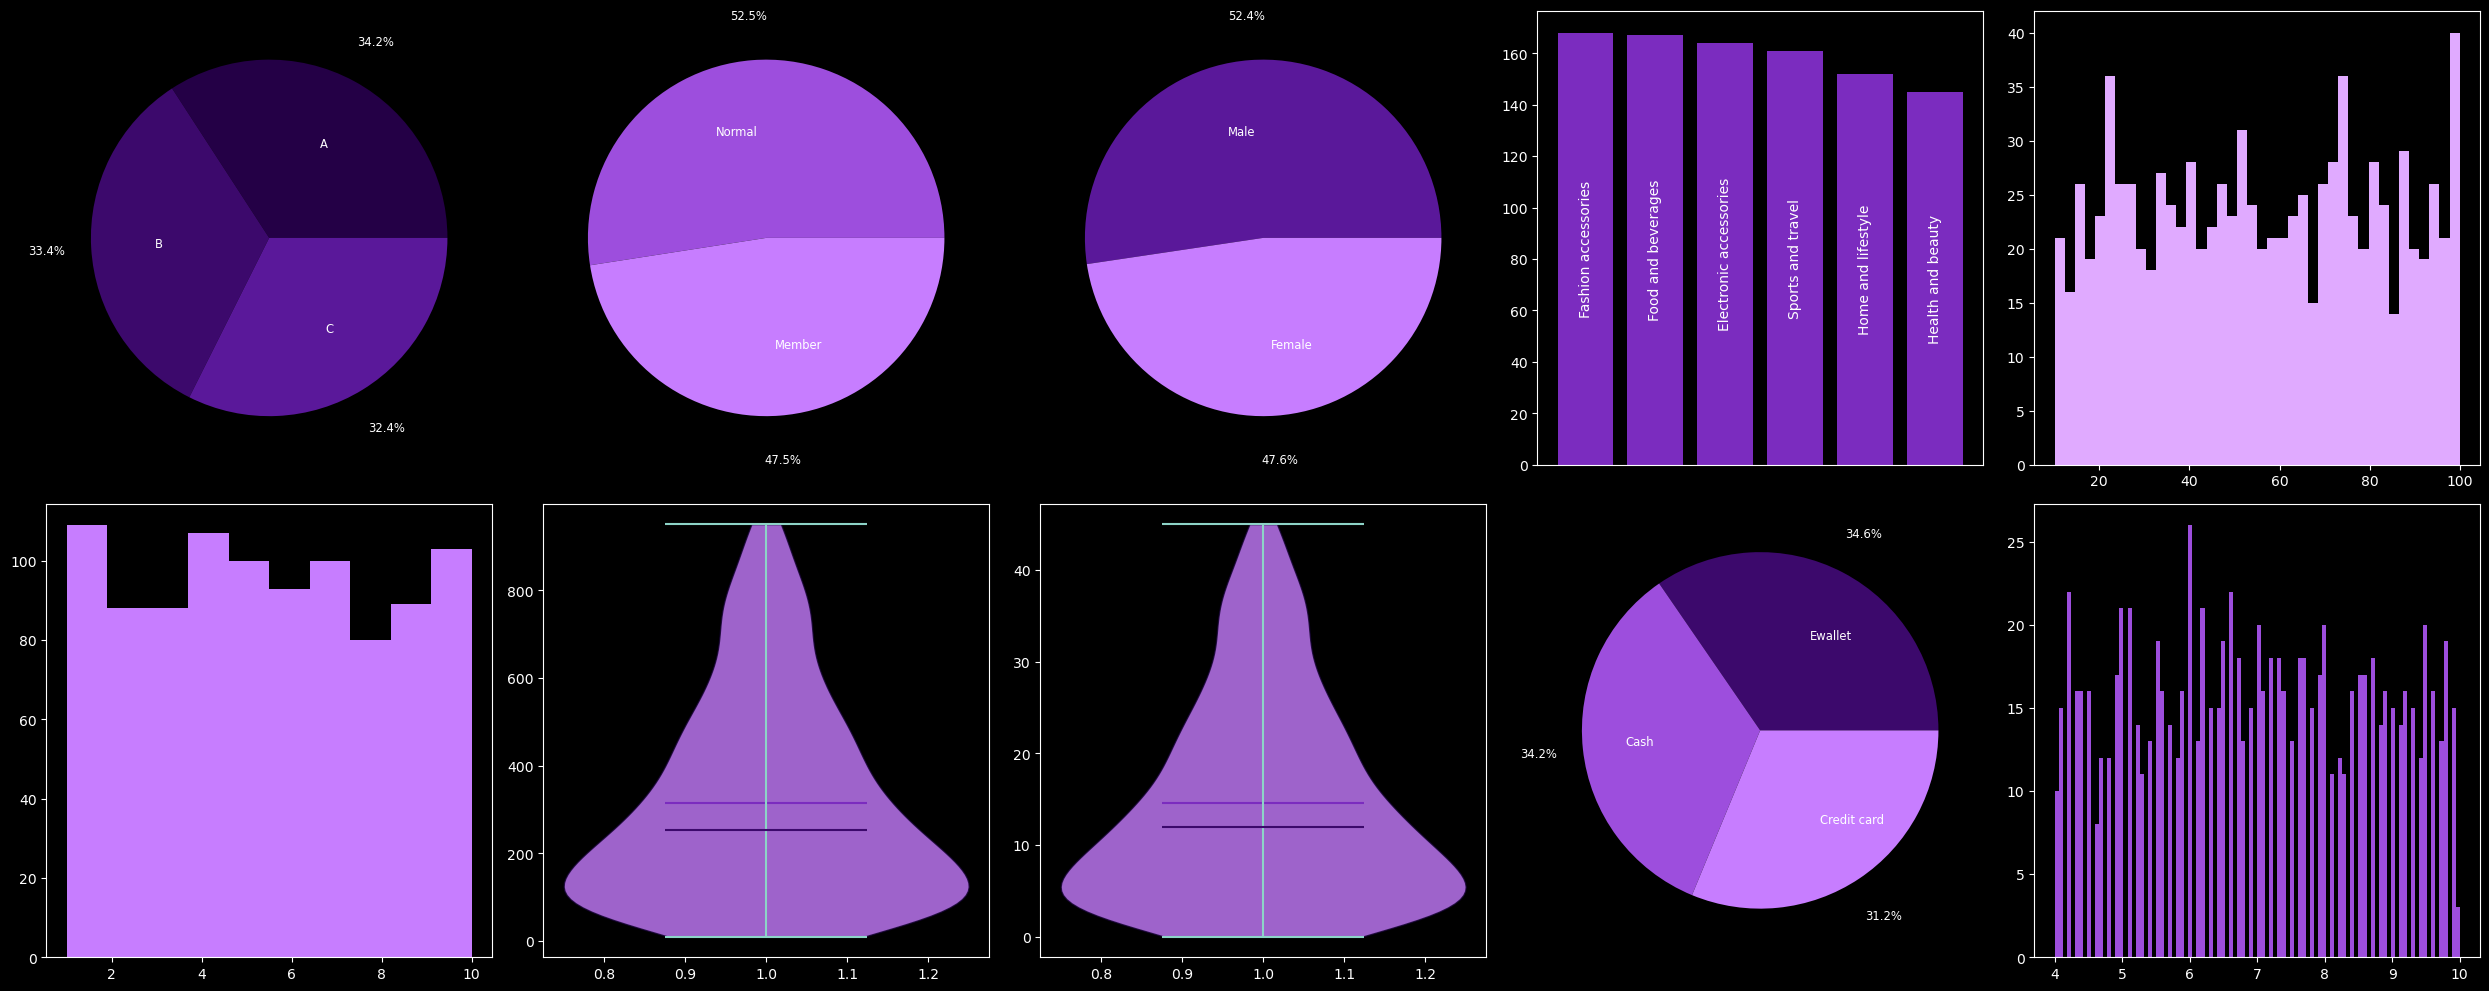

In [41]:
fig, axes = matplotlib.pyplot.subplots(2, 5, figsize=(25, 10))
axes = axes.flatten()

# Branch pie chart
axes[0].pie(
    sales["Branch"].value_counts().values,
    labels=sales["Branch"].value_counts().index,
    colors=PALETTE[1:4],
    autopct='%1.1f%%',
    pctdistance=1.25,
    labeldistance=0.6,
    textprops={'size': 'smaller', 'color': 'white'},
    rotatelabels=False
)

# Customer type pie chart
axes[1].pie(
    sales["Customer type"].value_counts().values,
    labels=sales["Customer type"].value_counts().index,
    colors=[PALETTE[5], PALETTE[6]],
    autopct='%1.1f%%',
    pctdistance=1.25,
    labeldistance=0.6,
    textprops={'size': 'smaller', 'color': 'white'},
    rotatelabels=False
)

# Gender pie chart
axes[2].pie(
    sales["Gender"].value_counts().values,
    labels=sales["Gender"].value_counts().index,
    colors=[PALETTE[3], PALETTE[6]],
    autopct='%1.1f%%',
    pctdistance=1.25,
    labeldistance=0.6,
    textprops={'size': 'smaller', 'color': 'white'},
    rotatelabels=False
)

# Product line bar plot
product_counts = sales["Product line"].value_counts()
axes[3].bar(
    x=product_counts.index,
    height=product_counts.values,
    color=PALETTE[4]
)
axes[3].set_xticks([])
for i, value in enumerate(product_counts.values):
    axes[3].text(i, value / 2, product_counts.index[i], ha='center', va='center', rotation=90)

# Unit price histogram
axes[4].hist(
    sales["Unit price"],
    bins=40,
    color=PALETTE[7]
)

# Quantity histogram
axes[5].hist(
    sales["Quantity"],
    bins=10,
    color=PALETTE[6]
)

# Total violin plot
total_violin = axes[6].violinplot(
    numpy.array(sales["Total"].astype(int)),
    showmeans=True, showextrema=True, showmedians=True
)

for pc in total_violin['bodies']:
    pc.set_facecolor(PALETTE[6])  
    pc.set_edgecolor(PALETTE[0])  
    pc.set_alpha(0.8)             
total_violin['cmeans'].set_color(PALETTE[4])
total_violin['cmedians'].set_color(PALETTE[2])

# Tax violin plot
tax_violin = axes[7].violinplot(
    numpy.array(sales["Tax 5%"].astype(int)),
    showmeans=True, showextrema=True, showmedians=True
)
for pc in tax_violin['bodies']:
    pc.set_facecolor(PALETTE[6])  
    pc.set_edgecolor(PALETTE[0])  
    pc.set_alpha(0.8)             
tax_violin['cmeans'].set_color(PALETTE[4])
tax_violin['cmedians'].set_color(PALETTE[2])

# Payment pie chart
axes[8].pie(
    sales["Payment"].value_counts().values,
    labels=sales["Payment"].value_counts().index,
    colors=[PALETTE[2], PALETTE[5], PALETTE[6]],
    autopct='%1.1f%%',
    pctdistance=1.25,
    labeldistance=0.6,
    textprops={'size': 'smaller', 'color': 'white'},
    rotatelabels=False
)

# Rating histogram
axes[9].hist(
    sales["Rating"],
    bins=100,
    color=PALETTE[5]
)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


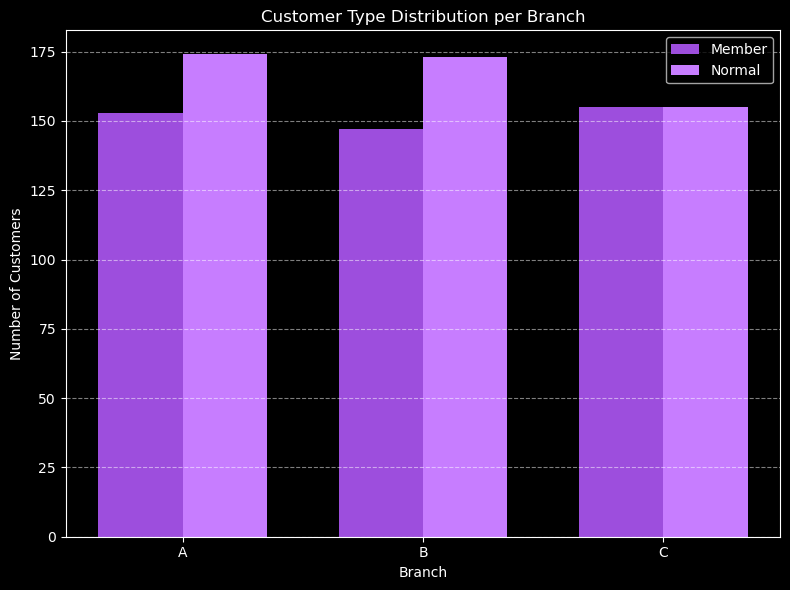

In [42]:
Branch2CustomerType=pandas.pivot_table(data=sales,index="Branch",columns="Customer type",aggfunc="size",fill_value=0).reset_index()

fig, ax = matplotlib.pyplot.subplots(figsize=(8, 6))
bar_width = 0.35
x = range(len(Branch2CustomerType))
ax.bar(
    [i - bar_width/2 for i in x],
    Branch2CustomerType['Member'],
    width=bar_width,
    color='#9D4EDD',
    label='Member'
)
ax.bar(
    [i + bar_width/2 for i in x],
    Branch2CustomerType['Normal'],
    width=bar_width,
    color='#C77DFF',
    label='Normal'
)
ax.set_xticks(x)
ax.set_xticklabels(Branch2CustomerType['Branch'])
ax.set_xlabel('Branch')
ax.set_ylabel('Number of Customers')
ax.set_title('Customer Type Distribution per Branch')
ax.legend()

matplotlib.pyplot.grid(axis='y', linestyle='--', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

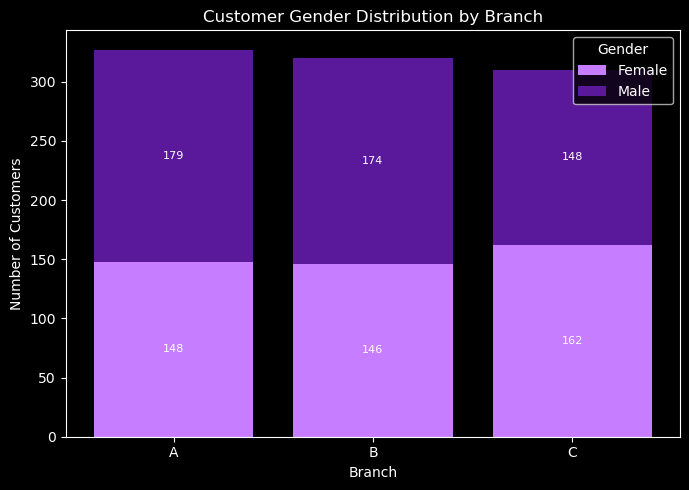

In [43]:
Branch2CustomerGender=pandas.pivot_table(data=sales,index="Branch",columns="Gender",aggfunc="size",fill_value=0).reset_index()

fig, ax = matplotlib.pyplot.subplots(figsize=(7, 5))

ax.bar(
    Branch2CustomerGender["Branch"],
    Branch2CustomerGender["Female"],
    label="Female",
    color=PALETTE[6]
)
ax.bar(
    Branch2CustomerGender["Branch"],
    Branch2CustomerGender["Male"],
    bottom=Branch2CustomerGender["Female"],
    label="Male",
    color=PALETTE[3]
)
ax.set_title("Customer Gender Distribution by Branch", fontsize=12)
ax.set_xlabel("Branch")
ax.set_ylabel("Number of Customers")
ax.legend(title="Gender")

for i, row in Branch2CustomerGender.iterrows():
    ax.text(i, row["Female"] / 2, str(row["Female"]), ha="center", va="center", fontsize=8)
    ax.text(i, row["Female"] + row["Male"] / 2, str(row["Male"]), ha="center", va="center", fontsize=8)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

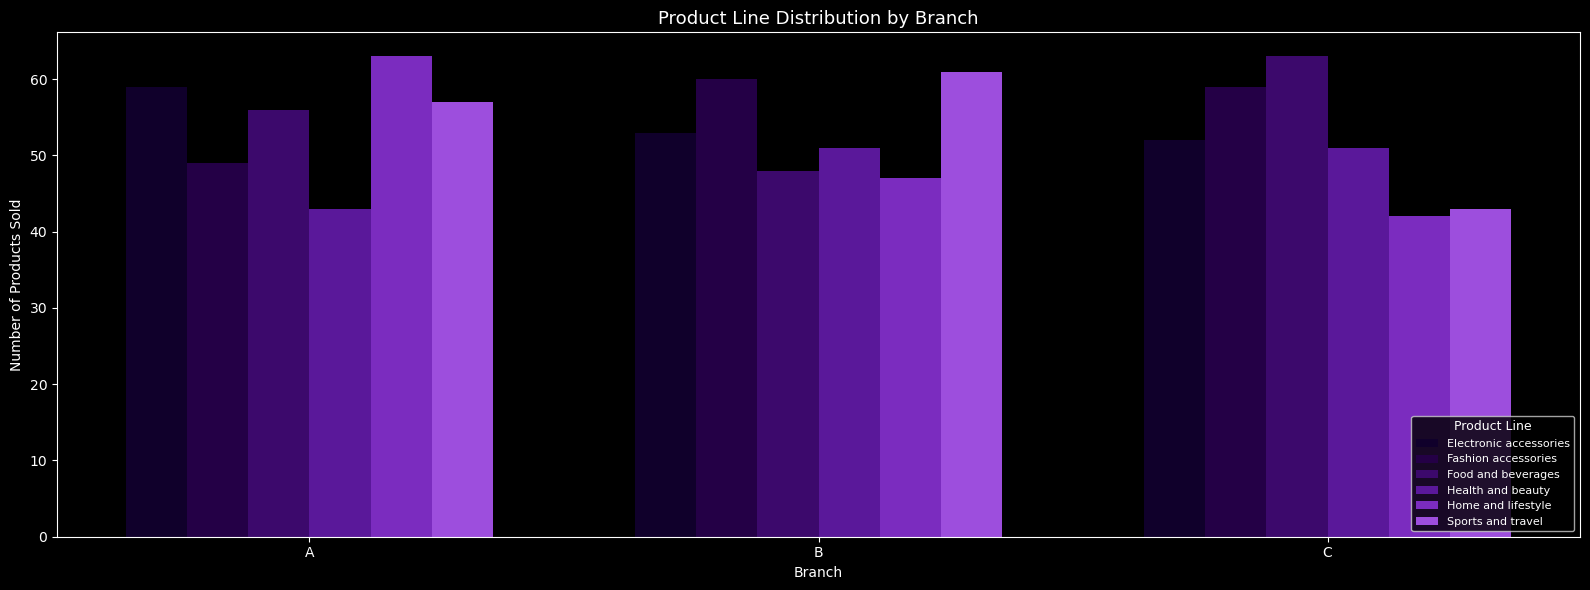

In [44]:
Branch2ProductLine=pandas.pivot_table(data=sales,index="Branch",columns="Product line",aggfunc="size",fill_value=0).reset_index()
fig, ax = matplotlib.pyplot.subplots(figsize=(16,6))
branches = Branch2ProductLine["Branch"]
product_lines = Branch2ProductLine.columns[1:]
bar_width = 0.12
x = numpy.arange(len(branches))
for i, product in enumerate(product_lines):
    ax.bar(
        x + i * bar_width,
        Branch2ProductLine[product],
        width=bar_width,
        label=product,
        color=PALETTE[i % len(PALETTE)]
    )

ax.set_xticks(x + (len(product_lines) / 2 - 0.5) * bar_width)
ax.set_xticklabels(branches)
ax.set_xlabel("Branch")
ax.set_ylabel("Number of Products Sold")
ax.set_title("Product Line Distribution by Branch", fontsize=13)
ax.legend(title="Product Line", fontsize=8, title_fontsize=9, loc="lower right")
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

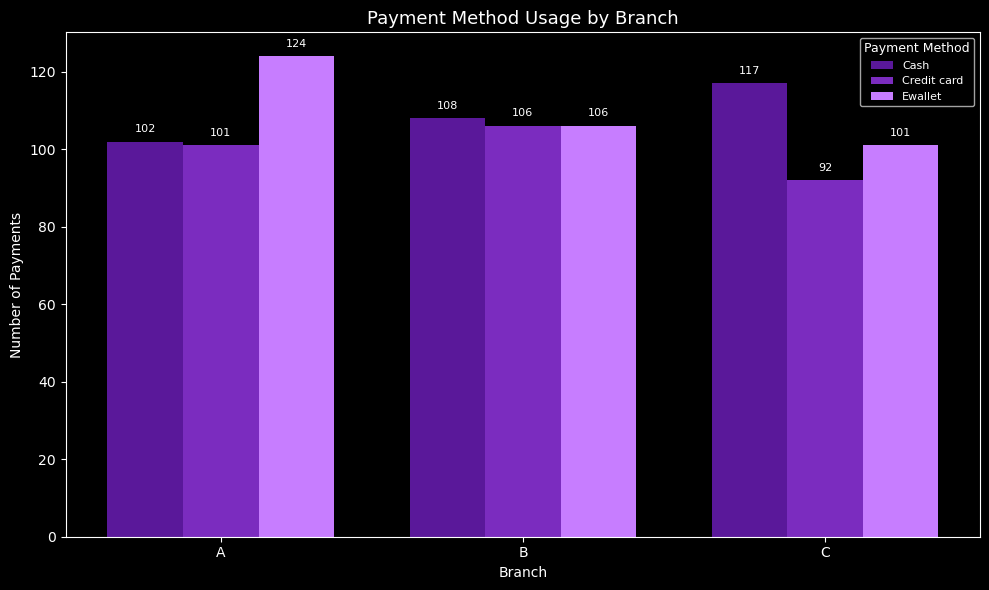

In [45]:
Branch2PaymentMethod=pandas.pivot_table(data=sales,index="Branch",columns="Payment",aggfunc="size",fill_value=0).reset_index()
PALETTEB2P = {
    "Cash": "#5A189A",         # Mid purple
    "Credit card": "#7B2CBF",  # Lighter purple
    "Ewallet": "#C77DFF"       # Lightest purple
}

fig, ax = matplotlib.pyplot.subplots(figsize=(10,6))
branches = Branch2PaymentMethod["Branch"]
payment_methods = ["Cash", "Credit card", "Ewallet"]
x = numpy.arange(len(branches))
bar_width = 0.25
for i, method in enumerate(payment_methods):
    ax.bar(
        x + i * bar_width,
        Branch2PaymentMethod[method],
        width=bar_width,
        label=method,
        color=PALETTEB2P[method]
    )
ax.set_xticks(x + bar_width)
ax.set_xticklabels(branches)
ax.set_xlabel("Branch")
ax.set_ylabel("Number of Payments")
ax.set_title("Payment Method Usage by Branch", fontsize=13)
for i, method in enumerate(payment_methods):
    for j, val in enumerate(Branch2PaymentMethod[method]):
        ax.text(j + i * bar_width, val + 2, str(val), ha='center', va='bottom', fontsize=8)

ax.legend(title="Payment Method", fontsize=8, title_fontsize=9)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [46]:
Branch2AverageTotalSales= pandas.DataFrame(sales.groupby(sales["Branch"])["Total"].mean().reset_index())
Branch2AverageTotalSales.rename(columns={'Branch':'Branch', 'Total':'Average Total Sales'},inplace=True)
Branch2AverageTotalSales

,Branch,Average Total Sales
0,A,310.29783
1,B,317.262586
2,C,321.663503


In [47]:
Branch2AverageQuantities=pandas.DataFrame(sales.groupby(sales["Branch"])["Quantity"].mean().reset_index())
Branch2AverageQuantities.rename(columns={'Branch':'Branch', 'Quantity':'Average Products Quantities'},inplace=True)
Branch2AverageQuantities

,Branch,Average Products Quantities
0,A,5.409786
1,B,5.446875
2,C,5.464516


In [48]:
Branch2AverageRating=pandas.DataFrame(sales.groupby(sales["Branch"])["Rating"].mean().reset_index())
Branch2AverageRating.rename(columns={'Branch':'Branch', 'Rating':'Average Customers Rating'},inplace=True)
Branch2AverageRating

,Branch,Average Customers Rating
0,A,7.023853
1,B,6.81954
2,C,7.059032


In [49]:
Branch2AverageTax = sales.groupby(sales["Branch"])["Tax 5%"].mean().reset_index()
Branch2AverageTax.rename(columns={'Tax 5%': 'Average Payed Tax'}, inplace=True)
Branch2AverageTax

,Branch,Average Payed Tax
0,A,14.776087
1,B,15.107742
2,C,15.31731


In [50]:
Branch2CustomerType

Customer type,Branch,Member,Normal
0,A,153,174
1,B,147,173
2,C,155,155


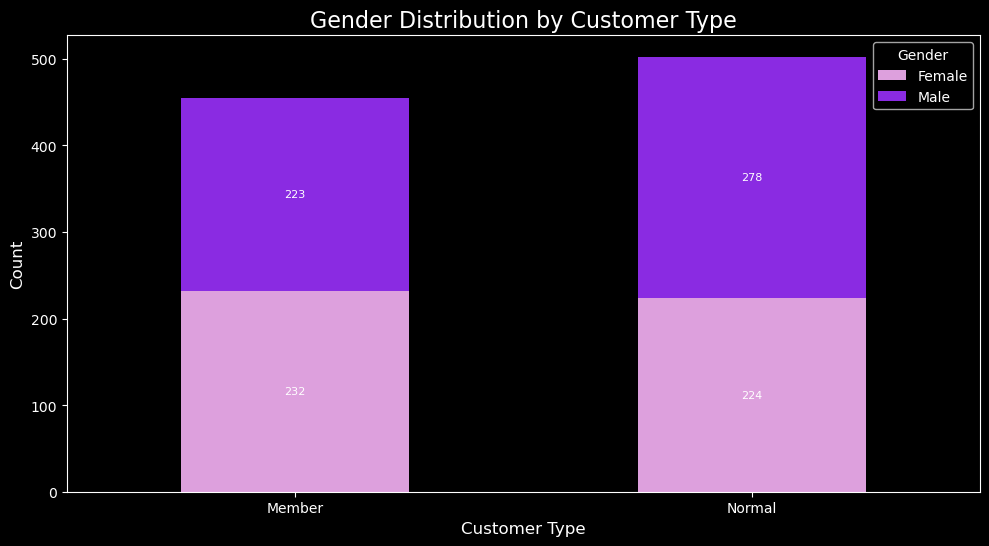

In [51]:
pivot_table = pandas.pivot_table(data=sales,index="Customer type",columns="Gender",aggfunc="size",fill_value=0)
ax = pivot_table.plot(kind='bar', stacked=True, color=['#DDA0DD', '#8A2BE2'], figsize=(10,6))
matplotlib.pyplot.title('Gender Distribution by Customer Type', fontsize=16)
matplotlib.pyplot.xlabel('Customer Type', fontsize=12)
matplotlib.pyplot.ylabel('Count', fontsize=12)
for i, row in enumerate(pivot_table.values):
    matplotlib.pyplot.text(i, row[0] / 2, str(row[0]), ha="center", va="center", fontsize=8)
    matplotlib.pyplot.text(i, row[0] + row[1] / 2, str(row[1]), ha="center", va="center", fontsize=8)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.xticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index, rotation=0)
matplotlib.pyplot.show()

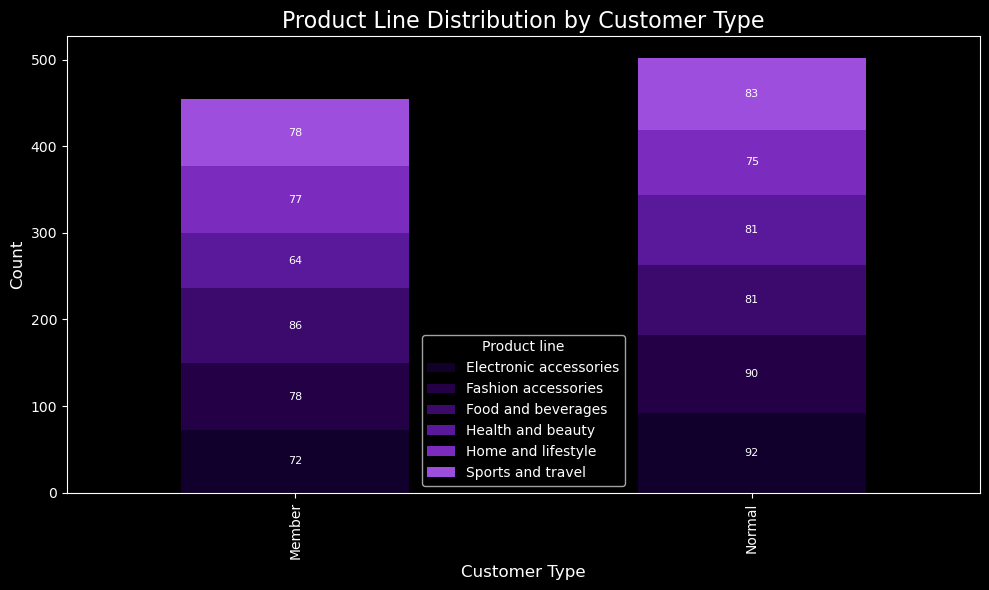

In [52]:
pivot_table = pandas.pivot_table(data=sales, index="Customer type",columns="Product line",aggfunc="size",fill_value=0)
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10,6), color=PALETTE[:len(pivot_table.columns)])
matplotlib.pyplot.title('Product Line Distribution by Customer Type', fontsize=16)
matplotlib.pyplot.xlabel('Customer Type', fontsize=12)
matplotlib.pyplot.ylabel('Count', fontsize=12)
for i, row in enumerate(pivot_table.values):
    y_offset = 0
    for j, value in enumerate(row):
        matplotlib.pyplot.text(i, y_offset + value / 2, str(value), ha="center", va="center", fontsize=8)
        y_offset += value
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

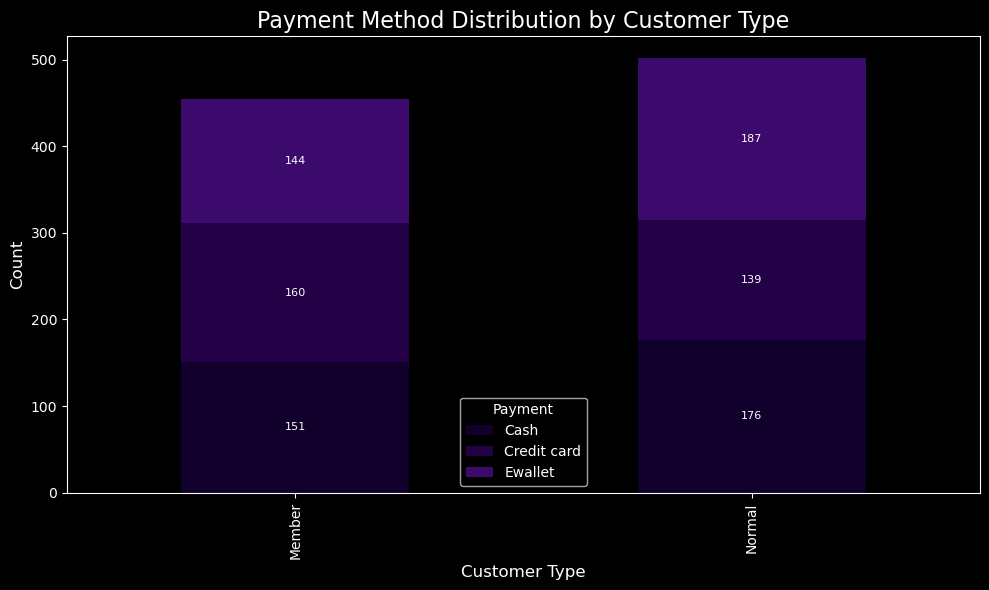

In [53]:
pivot_table = pandas.pivot_table(data=sales, index="Customer type",columns="Payment",aggfunc="size", fill_value=0)
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10,6), color=PALETTE[:len(pivot_table.columns)])
matplotlib.pyplot.title('Payment Method Distribution by Customer Type', fontsize=16)
matplotlib.pyplot.xlabel('Customer Type', fontsize=12)
matplotlib.pyplot.ylabel('Count', fontsize=12)
for i, row in enumerate(pivot_table.values):
    y_offset = 0
    for j, value in enumerate(row):
        matplotlib.pyplot.text(i, y_offset + value / 2, str(value), ha="center", va="center", fontsize=8)
        y_offset += value
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [54]:
sales.groupby(sales["Customer type"])["Quantity"].mean().reset_index()

,Customer type,Quantity
0,Member,5.538462
1,Normal,5.350598


In [55]:
sales.groupby(sales["Customer type"])["Total"].mean().reset_index()

,Customer type,Total
0,Member,324.188446
1,Normal,309.166058


In [56]:
sales.groupby(sales["Customer type"])["Rating"].mean().reset_index()

,Customer type,Rating
0,Member,6.943516
1,Normal,6.988153


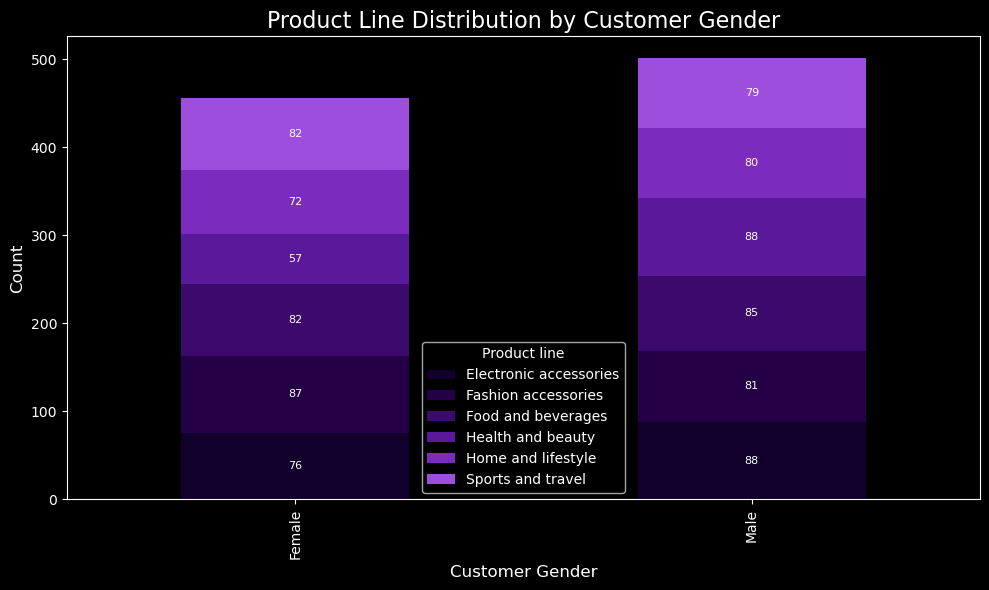

In [57]:
pivot_table = pandas.pivot_table(data=sales, index="Gender", columns="Product line", aggfunc="size", fill_value=0)
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10,6), color=PALETTE[:len(pivot_table.columns)])
matplotlib.pyplot.title('Product Line Distribution by Customer Gender', fontsize=16)
matplotlib.pyplot.xlabel('Customer Gender', fontsize=12)
matplotlib.pyplot.ylabel('Count', fontsize=12)
for i, row in enumerate(pivot_table.values):
    y_offset = 0 
    for j, value in enumerate(row):
        matplotlib.pyplot.text(i, y_offset + value / 2, str(value), ha="center", va="center", fontsize=8)
        y_offset += value
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

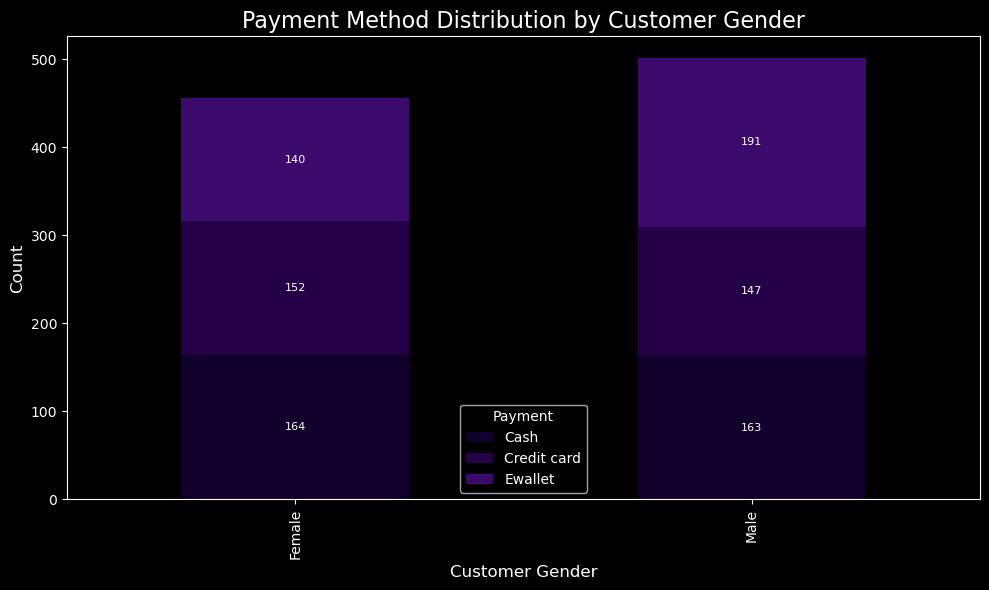

In [58]:
pivot_table = pandas.pivot_table(data=sales,index="Gender",columns="Payment",aggfunc="size",fill_value=0)
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10,6), color=["#10002B", "#240046", "#3C096C"])
matplotlib.pyplot.title('Payment Method Distribution by Customer Gender', fontsize=16)
matplotlib.pyplot.xlabel('Customer Gender', fontsize=12)
matplotlib.pyplot.ylabel('Count', fontsize=12)
for i, row in enumerate(pivot_table.values):
    y_offset = 0
    for j, value in enumerate(row):
        matplotlib.pyplot.text(i, y_offset + value / 2, str(value), ha="center", va="center", fontsize=8)
        y_offset += value
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [59]:
sales.groupby(sales["Gender"])["Quantity"].mean().reset_index()

,Gender,Quantity
0,Female,5.692982
1,Male,5.209581


In [60]:
sales.groupby(sales["Gender"])["Total"].mean().reset_index()

,Gender,Total
0,Female,325.658513
1,Male,307.798048


In [61]:
sales.groupby(sales["Gender"])["Rating"].mean().reset_index()

,Gender,Rating
0,Female,6.982237
1,Male,6.953


In [62]:
sales.groupby(sales["Product line"])["Unit price"].mean().reset_index()

,Product line,Unit price
0,Electronic accessories,54.463537
1,Fashion accessories,57.023393
2,Food and beverages,55.937066
3,Health and beauty,55.103172
4,Home and lifestyle,54.436184
5,Sports and travel,57.087267


In [63]:
sales.groupby(sales["Product line"])["Quantity"].mean().reset_index()

,Product line,Quantity
0,Electronic accessories,5.682927
1,Fashion accessories,4.952381
2,Food and beverages,5.39521
3,Health and beauty,5.6
4,Home and lifestyle,5.598684
5,Sports and travel,5.453416


In [64]:
sales.groupby(sales["Product line"])["Total"].mean().reset_index()

,Product line,Total
0,Electronic accessories,323.577155
1,Fashion accessories,290.94625
2,Food and beverages,316.396877
3,Health and beauty,323.048648
4,Home and lifestyle,319.420224
5,Sports and travel,326.268783


In [65]:
sales.groupby(sales["Product line"])["Rating"].mean().reset_index()

,Product line,Rating
0,Electronic accessories,6.92439
1,Fashion accessories,6.983333
2,Food and beverages,7.122156
3,Health and beauty,7.011724
4,Home and lifestyle,6.872059
5,Sports and travel,6.881366


In [66]:
sales.groupby(sales["Payment"])["Total"].mean().reset_index()

,Payment,Total
0,Cash,321.781298
1,Credit card,316.686216
2,Ewallet,310.560245


In [67]:
sales.groupby(sales["Payment"])["Rating"].mean().reset_index()

,Payment,Rating
0,Cash,6.993578
1,Credit card,6.958528
2,Ewallet,6.948196


In [68]:
sales.to_csv("/home/hussein-ali/CORE/Supermarket Sales Analysis/data/clean-sales-data.CSV")